In [71]:
import datetime
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#ML
from sklearn import preprocessing

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

In [2]:
df_p = pd.read_csv('./performance_data.csv')
df_w = pd.read_csv('./weather_data.csv')

In [3]:
df_w['TAVG'] = (df_w['TMAX'] + df_w['TMIN'])/2 # compute average temperature for a day

In [5]:
df_p['IRRIGATION'].unique()

array(['DRY', 'NONE', 'IRR', nan, 'LIRR', 'ECO'], dtype=object)

In [6]:
#For IRRIGATION column, DRY = NONE, so make this consistency evident:
def fix_irr(input_irr):
    if input_irr == "NONE":
        return "DRY"
    else:
        return input_irr

def irr_to_num(input_irr):
    if input_irr == "DRY":
        return 0
    elif input_irr == 'ECO':
        return 1
    elif input_irr == 'LIRR':
        return 2
    else:
        return 3
    
df_p['IRRIGATION'] = df_p['IRRIGATION'].apply(fix_irr)
#get rid of null IRRIGATION:
df_p = df_p.dropna(how='any')
df_p['IRRIGATION'] = df_p['IRRIGATION'].apply(irr_to_num)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
df_p['PLANT_DATE'] = df_p['PLANT_DATE'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d'))
df_p['HARVEST_DATE'] = df_p['HARVEST_DATE'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d'))
df_p['DAYS_TO_HARVEST'] = df_p['HARVEST_DATE'] - df_p['PLANT_DATE']
df_p['DAYS_TO_HARVEST'] = df_p['DAYS_TO_HARVEST'].apply(lambda x: x.days)
df_p = df_p[df_p['DAYS_TO_HARVEST']>=0]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [8]:
def date_to_nth_day(date):
    try:
        date = pd.to_datetime(date, format='%Y-%m-%d')
    except TypeError:
        date = pd.to_datetime(date, format='%m/%d/%Y')
    date = pd.to_datetime(date, format='%m/%d/%Y')
    new_year_day = pd.Timestamp(year=date.year, month=1, day=1)
    return (date - new_year_day).days + 1
df_p['PLANT_DATE'] = df_p['PLANT_DATE'].apply(lambda x: date_to_nth_day(x))
df_p['HARVEST_DATE'] = df_p['HARVEST_DATE'].apply(lambda x: date_to_nth_day(x))

In [9]:
d = df_p.groupby("ENV_ID").mean()

for ind in d.index:
    start = d['PLANT_DATE'][ind]
    end = d['HARVEST_DATE'][ind]
    df_w = df_w[~((df_w['ENV_ID'] == ind) & ((df_w['DAY_NUM'] > end) | (start > df_w['DAY_NUM'])))]
df_w

,ENV_ID,DAY_NUM,DAYL,PREC,SRAD,SWE,TMAX,TMIN,VP,TAVG
126,Env_1,127,53222.398438,0,441.600006,0,16.5,1.5,280,9.00
127,Env_1,128,53222.398438,0,374.399994,0,12.0,0.5,360,6.25
128,Env_1,129,53568.000000,0,483.200012,0,13.0,-4.5,200,4.25
129,Env_1,130,53568.000000,0,368.000000,0,9.5,-1.5,320,4.00
130,Env_1,131,53913.601562,0,380.799988,0,10.0,-1.5,280,4.25
131,Env_1,132,53913.601562,5,380.799988,0,17.0,-3.5,240,6.75
132,Env_1,133,54259.199219,15,156.800003,0,10.5,4.5,800,7.50
133,Env_1,134,54259.199219,0,355.200012,0,14.0,3.5,560,8.75
134,Env_1,135,54604.800781,0,457.600006,0,20.0,4.5,400,12.25
135,Env_1,136,54604.800781,0,464.000000,0,21.5,5.5,400,13.50


In [11]:
df_w['AVG_TEMP'] = (df_w['TMAX'] + df_w['TMIN'])/2
df_w_grouped = df_w.groupby('ENV_ID').mean()
df_w_grouped = df_w_grouped.drop(columns=['DAY_NUM', 'TMAX', 'TMIN', 'DAYL'])
df_w_grouped.reset_index()

df_p_merged = df_p.merge(df_w_grouped, how='left', on='ENV_ID')

In [12]:
df_p_merged.head()

,HYBRID_ID,ENV_ID,HYBRID_MG,ENV_MG,YIELD,YEAR,LAT,LONG,PLANT_DATE,HARVEST_DATE,...,OM,CEC,KSAT,DAYS_TO_HARVEST,PREC,SRAD,SWE,VP,TAVG,AVG_TEMP
0,H2782,Env_1,0,0,107.9577,2008,49.5,-98.0,127,308,...,6.1,24.2,9.4,181,2.642857,318.698902,0.0,1061.318681,14.079670,14.079670
1,H2782,Env_2,0,0,85.7498,2008,49.3,-98.1,135,296,...,6.9,25.2,10.2,161,2.783951,328.592593,0.0,1104.691358,15.046296,15.046296
2,H2240,Env_3,0,0,74.6116,2011,49.3,-98.0,137,290,...,6.7,25.5,9.9,153,2.077922,337.558441,0.0,1305.974026,16.995130,16.995130
3,H1527,Env_3,0,0,83.8191,2011,49.3,-98.0,137,290,...,6.7,25.5,9.9,153,2.077922,337.558441,0.0,1305.974026,16.995130,16.995130
4,H1369,Env_3,0,0,81.7917,2011,49.3,-98.0,137,290,...,6.7,25.5,9.9,153,2.077922,337.558441,0.0,1305.974026,16.995130,16.995130


In [13]:
df_p_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378963 entries, 0 to 378962
Data columns (total 29 columns):
HYBRID_ID          378963 non-null object
ENV_ID             378963 non-null object
HYBRID_MG          378963 non-null int64
ENV_MG             378963 non-null int64
YIELD              378963 non-null float64
YEAR               378963 non-null int64
LAT                378963 non-null float64
LONG               378963 non-null float64
PLANT_DATE         378963 non-null int64
HARVEST_DATE       378963 non-null int64
IRRIGATION         378963 non-null int64
ENV_YIELD_MEAN     378963 non-null float64
ENV_YIELD_STD      378963 non-null float64
ELEVATION          378963 non-null float64
CLAY               378963 non-null float64
SILT               378963 non-null float64
SAND               378963 non-null float64
AWC                378963 non-null float64
PH                 378963 non-null float64
OM                 378963 non-null float64
CEC                378963 non-null float64


# Categorical

In [14]:
#creating Hybrid and Env DF
environment = df_p_merged.drop(columns=['HYBRID_ID', 'HYBRID_MG', 
                                        'YIELD', 'YEAR', 'PLANT_DATE', 
                                        'HARVEST_DATE', 'LAT', 'LONG']).groupby('ENV_ID').agg(min)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


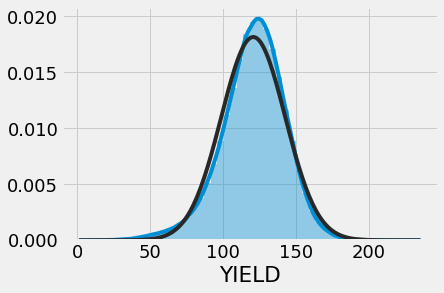

In [209]:
sns.distplot(df_p_merged.YIELD, fit=stats.norm)

In [210]:
df_p_merged.YIELD.describe(percentiles=[.2,.4,.6,.8]) 

count    378963.000000
mean        120.736367
std          21.965353
min           6.031800
20%         103.984680
40%         116.874460
50%         122.097500
60%         127.124700
80%         138.547660
max         230.607000
Name: YIELD, dtype: float64

In [214]:
df_p_merged['Yield_Q'] = pd.cut(df_p_merged.YIELD, bins = [0, 103.984680, 116.874460, 122.097500, 138.547660, 230.607000], labels = [1,2,3,4,5])

In [215]:
df_p_merged.head()

,HYBRID_ID,ENV_ID,HYBRID_MG,ENV_MG,YIELD,YEAR,LAT,LONG,PLANT_DATE,HARVEST_DATE,...,CEC,KSAT,DAYS_TO_HARVEST,PREC,SRAD,SWE,VP,TAVG,AVG_TEMP,Yield_Q
0,H2782,Env_1,0,0,107.9577,2008,49.5,-98.0,127,308,...,24.2,9.4,181,2.642857,318.698902,0.0,1061.318681,14.079670,14.079670,2
1,H2782,Env_2,0,0,85.7498,2008,49.3,-98.1,135,296,...,25.2,10.2,161,2.783951,328.592593,0.0,1104.691358,15.046296,15.046296,1
2,H2240,Env_3,0,0,74.6116,2011,49.3,-98.0,137,290,...,25.5,9.9,153,2.077922,337.558441,0.0,1305.974026,16.995130,16.995130,1
3,H1527,Env_3,0,0,83.8191,2011,49.3,-98.0,137,290,...,25.5,9.9,153,2.077922,337.558441,0.0,1305.974026,16.995130,16.995130,1
4,H1369,Env_3,0,0,81.7917,2011,49.3,-98.0,137,290,...,25.5,9.9,153,2.077922,337.558441,0.0,1305.974026,16.995130,16.995130,1


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: T

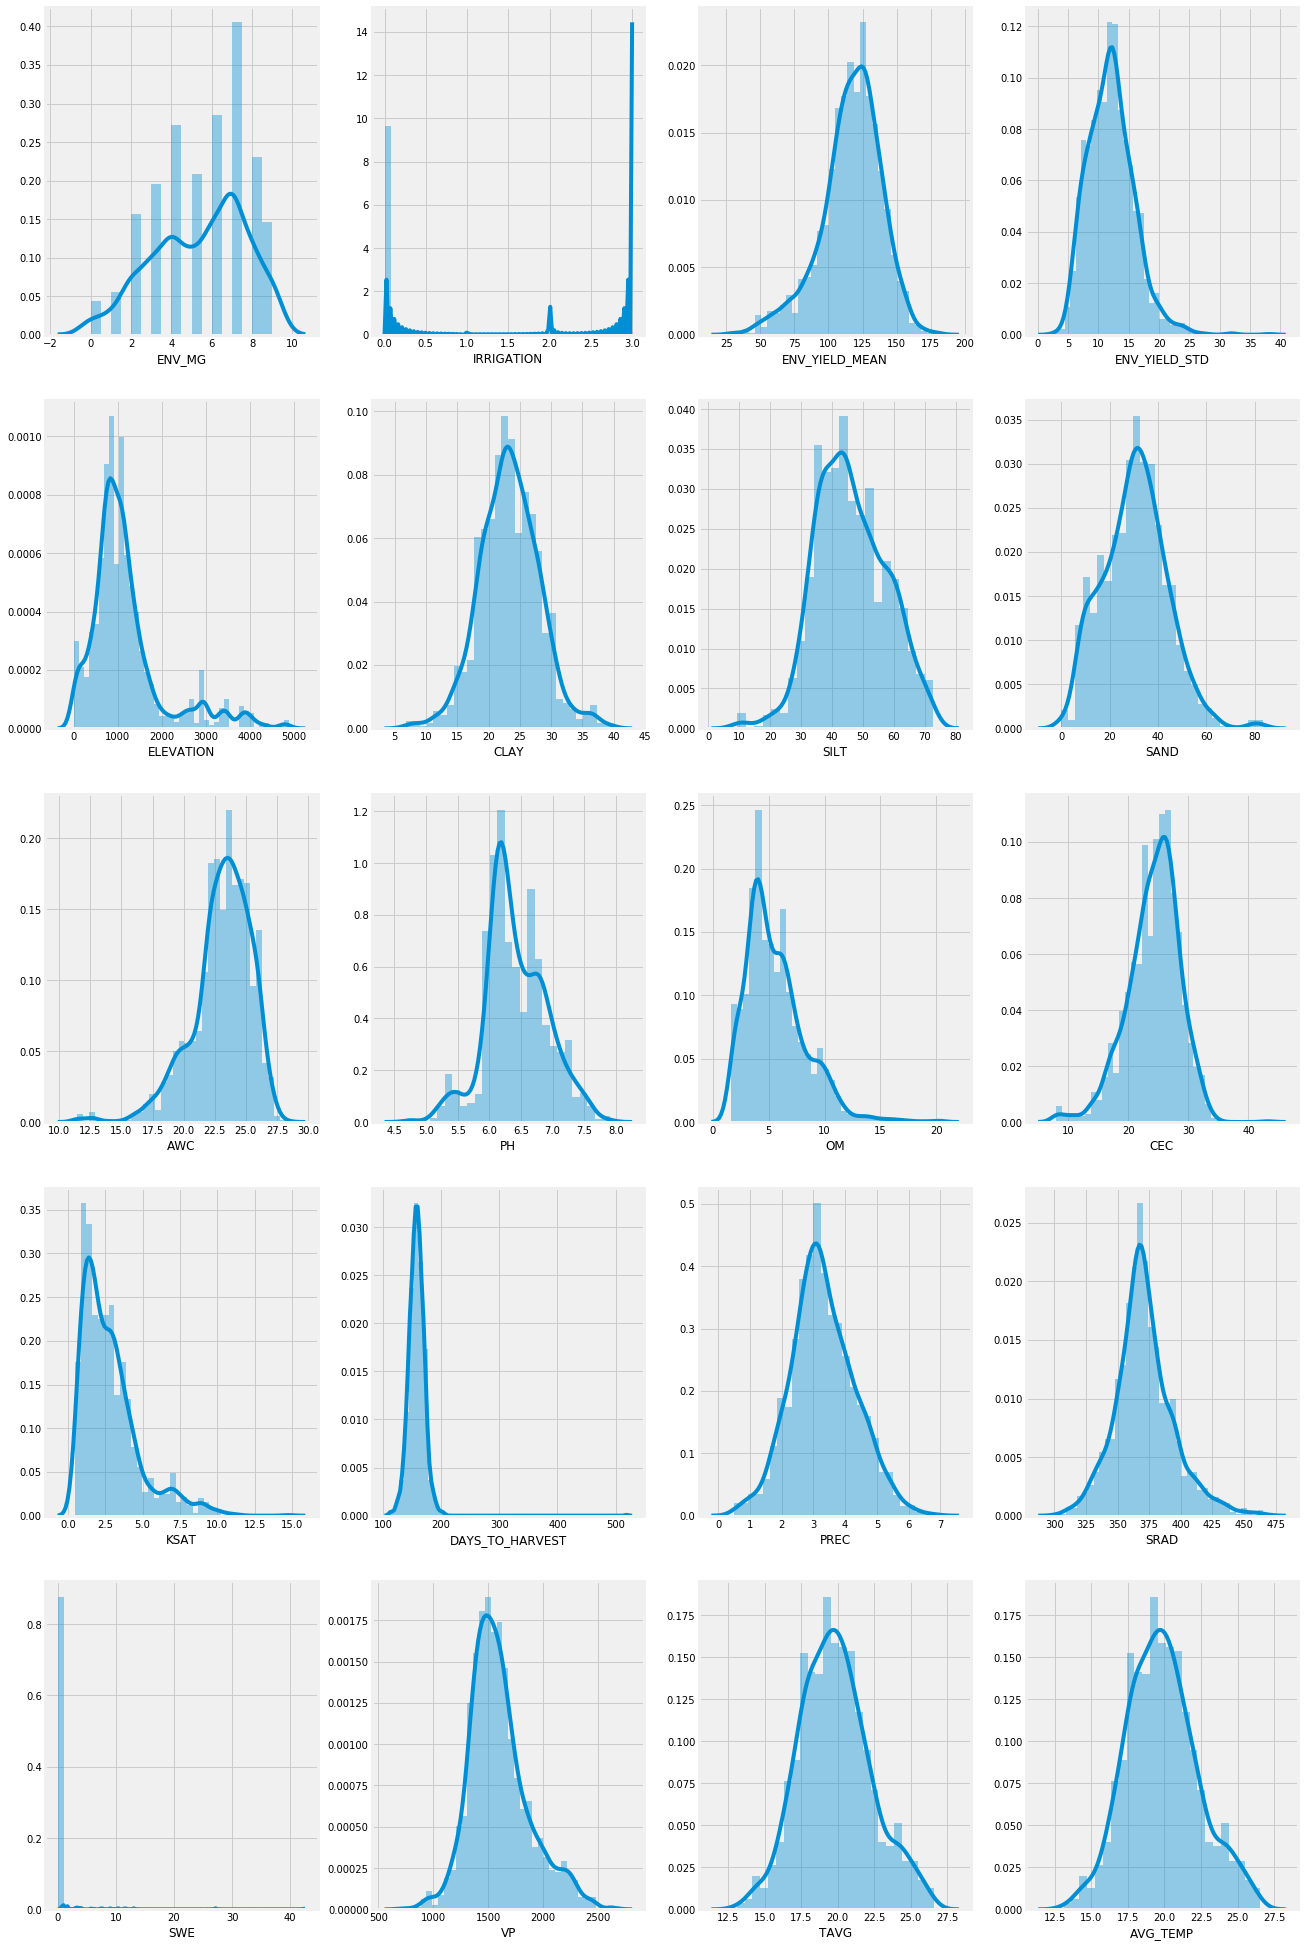

In [17]:
fig, ax = plt.subplots(5, 4, figsize=(20,35))

for i, column in enumerate(environment.columns):
    plt.subplot(5,4,i+ 1)
    sns.distplot(environment[column])

In [18]:
#give to david for clustering algorithms 
#get back 4 clusters with top performing hybrids in each cluster
{0: ['H1027', 'H1537', 'H1466', 'H1097', 'H1020'],
 1: ['H3879', 'H1016', 'H3823', 'H3735', 'H3973'],
 2: ['H3690', 'H3724', 'H3910', 'H2523', 'H1001'],
 3: ['H2916', 'H2933', 'H1007', 'H1430', 'H1146']}


In [19]:
df_p_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378963 entries, 0 to 378962
Data columns (total 29 columns):
HYBRID_ID          378963 non-null object
ENV_ID             378963 non-null object
HYBRID_MG          378963 non-null int64
ENV_MG             378963 non-null int64
YIELD              378963 non-null float64
YEAR               378963 non-null int64
LAT                378963 non-null float64
LONG               378963 non-null float64
PLANT_DATE         378963 non-null int64
HARVEST_DATE       378963 non-null int64
IRRIGATION         378963 non-null int64
ENV_YIELD_MEAN     378963 non-null float64
ENV_YIELD_STD      378963 non-null float64
ELEVATION          378963 non-null float64
CLAY               378963 non-null float64
SILT               378963 non-null float64
SAND               378963 non-null float64
AWC                378963 non-null float64
PH                 378963 non-null float64
OM                 378963 non-null float64
CEC                378963 non-null float64


In [216]:
clean = df_p_merged.copy()
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378963 entries, 0 to 378962
Data columns (total 30 columns):
HYBRID_ID          378963 non-null object
ENV_ID             378963 non-null object
HYBRID_MG          378963 non-null int64
ENV_MG             378963 non-null int64
YIELD              378963 non-null float64
YEAR               378963 non-null int64
LAT                378963 non-null float64
LONG               378963 non-null float64
PLANT_DATE         378963 non-null int64
HARVEST_DATE       378963 non-null int64
IRRIGATION         378963 non-null int64
ENV_YIELD_MEAN     378963 non-null float64
ENV_YIELD_STD      378963 non-null float64
ELEVATION          378963 non-null float64
CLAY               378963 non-null float64
SILT               378963 non-null float64
SAND               378963 non-null float64
AWC                378963 non-null float64
PH                 378963 non-null float64
OM                 378963 non-null float64
CEC                378963 non-null float64


In [219]:
performance = clean.drop(columns = ['HYBRID_MG','ENV_ID','ENV_MG','YEAR','LAT','LONG','PLANT_DATE','HARVEST_DATE','ENV_YIELD_MEAN','ENV_YIELD_STD'])

In [220]:
performance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378963 entries, 0 to 378962
Data columns (total 20 columns):
HYBRID_ID          378963 non-null object
YIELD              378963 non-null float64
IRRIGATION         378963 non-null int64
ELEVATION          378963 non-null float64
CLAY               378963 non-null float64
SILT               378963 non-null float64
SAND               378963 non-null float64
AWC                378963 non-null float64
PH                 378963 non-null float64
OM                 378963 non-null float64
CEC                378963 non-null float64
KSAT               378963 non-null float64
DAYS_TO_HARVEST    378963 non-null int64
PREC               378963 non-null float64
SRAD               378963 non-null float64
SWE                378963 non-null float64
VP                 378963 non-null float64
TAVG               378963 non-null float64
AVG_TEMP           378963 non-null float64
Yield_Q            378963 non-null category
dtypes: category(1), float64(16),

In [221]:
performance.describe()

,YIELD,IRRIGATION,ELEVATION,CLAY,SILT,SAND,AWC,PH,OM,CEC,KSAT,DAYS_TO_HARVEST,PREC,SRAD,SWE,VP,TAVG,AVG_TEMP
count,378963.000000,378963.000000,378963.000000,378963.000000,378963.000000,378963.000000,378963.000000,378963.000000,378963.000000,378963.000000,378963.000000,378963.000000,378963.000000,378963.000000,378963.000000,378963.000000,378963.000000,378963.000000
mean,120.736367,0.600143,1167.981303,24.409702,48.850919,26.711813,23.731792,6.398541,5.557358,25.507297,2.365850,157.863148,3.436800,370.470823,0.049513,1592.417026,19.680947,19.680947
std,21.965353,1.189885,702.914065,4.087980,10.631763,12.398298,2.081753,0.373393,2.229029,3.693086,1.678254,16.346435,0.979647,18.478325,0.645067,208.355420,1.927883,1.927883
min,6.031800,0.000000,-2.500000,6.800000,9.300000,0.000000,11.400000,4.700000,1.600000,8.033333,0.500000,112.000000,0.496503,300.689109,0.000000,726.467066,13.101036,13.101036
25%,107.837900,0.000000,754.560000,21.700000,41.000000,17.200000,22.500000,6.200000,4.000000,23.300000,1.200000,149.000000,2.761905,359.941463,0.000000,1460.598802,18.364062,18.364062
50%,122.097500,0.000000,1010.430000,24.700000,48.300000,27.000000,24.050000,6.300000,5.000000,25.800000,1.800000,157.000000,3.301136,369.114840,0.000000,1579.337748,19.677365,19.677365
75%,135.311650,0.000000,1288.000000,27.200000,57.700000,35.200000,25.350000,6.600000,7.000000,27.800000,3.100000,165.000000,4.109756,379.022222,0.000000,1698.523490,20.913110,20.913110
max,230.607000,3.000000,4905.310000,39.500000,72.800000,83.300000,28.250000,7.900000,20.300000,43.200000,14.700000,519.000000,6.873418,469.447329,42.600000,2642.589928,26.553435,26.553435


In [32]:
#0: ['H1027', 'H1537', 'H1466', 'H1097', 'H1020']

In [222]:
H1007 = performance[(performance['HYBRID_ID'] == 'H1027')]
H1537 = performance[(performance['HYBRID_ID'] == 'H1027')]

In [223]:
len(H1027.YIELD)

228

In [46]:
#Josh's code
#Using top 10 hybrids: 
env = df_p.groupby('ENV_ID')
hyb = df_p.groupby('HYBRID_ID').mean()
hyb['#_UNIQUE_ENVs'] = np.nan

g = df_p.groupby(['HYBRID_ID', 'ENV_ID']).count()
#shows the # of environments per hybridID

for ind in g.index.get_level_values(0).unique():
    hyb['#_UNIQUE_ENVs'][ind] = len(g.loc[ind].index)

#check for the average #_UNIQUE_ENVs:
mean_envs = hyb['#_UNIQUE_ENVs'].mean()
#now produce top 10 HYBRID_IDs with above the mean #_UNIQUE_ENVs:
top_above_mean = hyb.sort_values('YIELD', ascending = False)
top_above_mean = top_above_mean[top_above_mean['#_UNIQUE_ENVs']>mean_envs][0:10]

In [47]:
df_clean = df_p_merged[df_p_merged['HYBRID_ID'].isin(top_above_mean.index)]

In [54]:
josh = df_clean['HYBRID_ID'].unique()

In [55]:
#normalizse data
josh_list = josh.tolist()
josh_list

['H1001',
 'H3742',
 'H1007',
 'H1279',
 'H2641',
 'H1008',
 'H1057',
 'H1418',
 'H3819',
 'H2266']

In [64]:
top_ID = ['H1027', 'H1537', 'H1466', 'H1097', 'H1020','H3879', 'H1016', 'H3823', 'H3735', 'H3973','H3690', 'H3724', 'H3910', 'H2523', 'H1001','H2916', 'H2933', 'H1007', 'H1430', 'H1146']
size = {}

for id in top_ID:
    df = performance[(performance['HYBRID_ID'] == id)]
    id_string = id
    id = df
    size[id_string] = len(id.YIELD)
print(size)

#'H1007': 3130, 'H1430': 2480, 'H1146': 2581
list(set(top_ID).intersection(josh_list))

{'H1027': 228, 'H1537': 189, 'H1466': 418, 'H1097': 234, 'H1020': 2983, 'H3879': 31, 'H1016': 441, 'H3823': 37, 'H3735': 22, 'H3973': 32, 'H3690': 36, 'H3724': 47, 'H3910': 31, 'H2523': 57, 'H1001': 627, 'H2916': 412, 'H2933': 647, 'H1007': 3130, 'H1430': 2480, 'H1146': 2581}


['H1007', 'H1001']

In [224]:
H1007 = performance[(performance['HYBRID_ID'] == 'H1007')]
H1001 = performance[(performance['HYBRID_ID'] == 'H1001')]

In [225]:
H1007.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3130 entries, 156594 to 378949
Data columns (total 20 columns):
HYBRID_ID          3130 non-null object
YIELD              3130 non-null float64
IRRIGATION         3130 non-null int64
ELEVATION          3130 non-null float64
CLAY               3130 non-null float64
SILT               3130 non-null float64
SAND               3130 non-null float64
AWC                3130 non-null float64
PH                 3130 non-null float64
OM                 3130 non-null float64
CEC                3130 non-null float64
KSAT               3130 non-null float64
DAYS_TO_HARVEST    3130 non-null int64
PREC               3130 non-null float64
SRAD               3130 non-null float64
SWE                3130 non-null float64
VP                 3130 non-null float64
TAVG               3130 non-null float64
AVG_TEMP           3130 non-null float64
Yield_Q            3130 non-null category
dtypes: category(1), float64(16), int64(2), object(1)
memory usage: 49

In [72]:
#H1001.info()

In [ ]:
#start by training on H1007

In [227]:
H1007_X = H1007[['IRRIGATION','ELEVATION','CLAY','SILT','AWC','PH','OM','CEC','KSAT','DAYS_TO_HARVEST','PREC','SRAD','SWE','VP','TAVG','AVG_TEMP']]
H1007_Y = H1007[['YIELD']]
H1007_Y2 = H1007[['Yield_Q']]

In [228]:
#does as matrix preserve order?
#X = H1007_X.as_matrix()
#Y = H1007_Y.as_matrix()
#

X = H1007_X
Y = H1007_Y
Y2 = H1007_Y2

In [229]:
print('SHAPE:', X.shape)
X

SHAPE: (3130, 16)


,IRRIGATION,ELEVATION,CLAY,SILT,AWC,PH,OM,CEC,KSAT,DAYS_TO_HARVEST,PREC,SRAD,SWE,VP,TAVG,AVG_TEMP
156594,0,604.56,22.5,47.5,23.60,6.2,6.0,25.7,2.0,152,4.183007,369.631371,0.0,1646.535948,19.774510,19.774510
166227,0,769.93,22.5,70.3,25.00,6.1,4.7,24.7,0.8,158,4.062893,373.071698,0.0,1543.647799,19.059748,19.059748
166345,0,769.93,22.5,70.3,25.00,6.1,4.7,24.7,0.8,158,4.062893,373.071698,0.0,1543.647799,19.059748,19.059748
170105,3,3323.03,18.0,33.0,19.15,6.8,2.1,20.0,7.0,167,1.904762,398.342857,0.0,1430.000000,19.867560,19.867560
170221,2,3313.33,18.0,33.0,19.20,6.8,2.1,20.2,6.8,167,1.904762,398.342857,0.0,1430.000000,19.867560,19.867560
182148,0,1045.06,26.5,43.0,24.60,6.2,4.0,28.2,1.7,150,4.582781,365.499338,0.0,1787.549669,21.168874,21.168874
182150,0,1045.06,26.5,43.0,24.60,6.2,4.0,28.2,1.7,150,4.582781,365.499338,0.0,1787.549669,21.168874,21.168874
182186,0,1045.06,26.5,43.0,24.60,6.2,4.0,28.2,1.7,150,4.582781,365.499338,0.0,1787.549669,21.168874,21.168874
182203,0,1045.06,26.5,43.0,24.60,6.2,4.0,28.2,1.7,150,4.582781,365.499338,0.0,1787.549669,21.168874,21.168874
182237,0,1045.06,26.5,43.0,24.60,6.2,4.0,28.2,1.7,150,4.582781,365.499338,0.0,1787.549669,21.168874,21.168874


In [230]:
Y.shape

(3130, 1)

In [231]:
Y2.shape

(3130, 1)

In [232]:
#A. notes
#when I try to do feature selection it would be good to have column names
#try max_iter = 1000, activateion=‘relu’, hidden layer (20,20)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train, X_test, Y2_train, Y2_test = train_test_split(X, Y2, test_size=0.2)
s = StandardScaler()
X_train_scaled = s.fit_transform(X_train) #fits the standard scalar
X_test_scaled = s.transform(X_test) #transform uses what it knows to train the other stuff
#we want test to be scaled in the same way that train is
#do not scale y!!! it is what we are trying to find 
X_train_scaled

array([[-0.76896164, -0.5475755 , -0.03221919, ...,  0.15449164,
        -0.0939654 , -0.0939654 ],
       [-0.76896164, -0.46673514,  0.35157558, ..., -0.2838411 ,
        -0.42277024, -0.42277024],
       [-0.76896164, -0.56896493, -0.55993701, ...,  0.25969425,
         0.07139861,  0.07139861],
       ...,
       [ 1.30293214, -0.55849876, -0.79980875, ...,  0.21345752,
        -0.10936587, -0.10936587],
       [-0.76896164, -0.58234945,  0.8792934 , ..., -1.2056881 ,
        -1.92069306, -1.92069306],
       [-0.76896164, -0.68347168,  0.39954993, ...,  0.53851843,
         0.28926913,  0.28926913]])

In [233]:
#categorical 
print(X_train.shape, Y2_train.shape, X_test.shape, Y2_test.shape)

(2504, 16) (2504, 1) (626, 16) (626, 1)


In [207]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2504, 16) (2504, 1) (626, 16) (626, 1)


In [208]:
from sklearn.neural_network import MLPRegressor
#if I'm using a support vector machine then I have to scale, but the net will learn 
#what numbers do I adjust here to make it "better"

#zebra
#if I add layers the cpu will crash, better to do less layers more nodes
mlp = MLPRegressor(activation="relu",solver="adam",
                    hidden_layer_sizes=(50,50),batch_size='auto',
                   learning_rate='adaptive',max_iter = 1000,
                    warm_start=True, early_stopping=True,
                    validation_fraction=0.10,
                   )
mlp.fit(X_train_scaled, Y_train)


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=True)

In [239]:
predictions = mlp.predict(X_test_scaled)
predictions = predictions.reshape(626,1)
predictions.shape

(626, 1)

In [162]:
print('Accuracy training : {:.3f}'.format(mlp.score(X_train_scaled, Y_train)))

(626, 1)

In [167]:
print('Accuracy training : {:.3f}'.format(mlp.score(X_train_scaled, Y_train)))

Accuracy training : 0.308


In [180]:
from scipy import stats
slope, intercept, r_value, p_valu, std_err = stats.linregress(actuals,predictions)
print("r^2:", r_value**2)

ValueError: too many values to unpack (expected 4)

# Multi-layer Perceptron Classifier

In [241]:
from sklearn.neural_network import MLPClassifier
#try max_iter = 1000, activateion=‘relu’, hidden layer (20,20)
clf = MLPClassifier(solver='adam', activation ='relu', 
                    alpha=1e-5, hidden_layer_sizes=(20,20), 
                    max_iter = 1000, random_state=1)

# Logistic Regression

In [183]:
#try_1
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_scaled, Y_train)
lr_predictions = model.predict(x_test)
lr_actuals = np.array(y_test)
print(logistic_acc)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'

Intercept: 
 [137.79778934]
Coefficients: 
 [[  0.19384044   2.0991582   -1.16850058   8.74211397 -12.39305486
   -2.6852253   -0.89520294   7.26559175   5.13012653   1.70438756
    0.84819891   1.95199518  -0.06014535   2.46592365  -4.3306896
   -4.3306896 ]]
Mean squared error: 314.77
Variance score: 0.21
Sizes:  (626, 16) (626, 1) (626, 1)


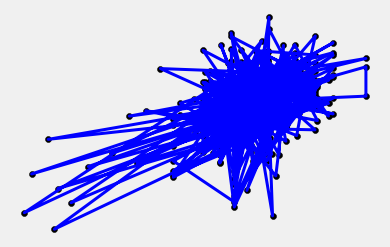

In [202]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

regr = linear_model.LinearRegression()
regr.fit(X_train_scaled, Y_train)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Y_prediction = regr.predict(X_test_scaled)
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_prediction))
print('Variance score: %.2f' % r2_score(Y_test, Y_prediction))

print("Sizes: ", X_test_scaled.shape, Y_test.shape, Y_prediction.shape)

plt.scatter(Y_prediction, Y_test, color = 'black')
plt.plot(Y_prediction, Y_test, color = 'blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()
#lol idk


# Random Forest

In [172]:
#random forest is only for classification 
#

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

parameters = {
     'n_estimators':(10,30, 50,100), #the number of trees
     'max_samples':(.30,.40,.50,1.0),
     'max_features':(5,10,20,60),
     
}

model = GridSearchCV(BaggingClassifier(),parameters,cv=3,iid=False)
inputs = X_train_scaled
outputs = df[60]
model.fit(inputs, np.ravel(outputs))
model.best_score_, model.best_params_

KeyError: 60

# Cross Validation

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
